Setup

In [100]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
#import geopandas as gpd

sns.set(color_codes=True)

In [101]:
killings_file_path = r"data/PoliceKilling/PoliceKillingsUS.csv"
killings = pd.read_csv(killings_file_path, encoding='latin1')

In [102]:
killings.tail()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.0,M,NaN,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,28/07/17,shot,vehicle,NaN,M,NaN,Albuquerque,NM,False,attack,Car,False
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.0,M,NaN,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.0,M,B,Oshkosh,WI,False,attack,Car,True
2534,2815,Dwayne Jeune,31/07/17,shot,knife,32.0,M,B,Brooklyn,NY,True,attack,Not fleeing,False


In [143]:
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')

In [103]:
killings = killings.dropna()

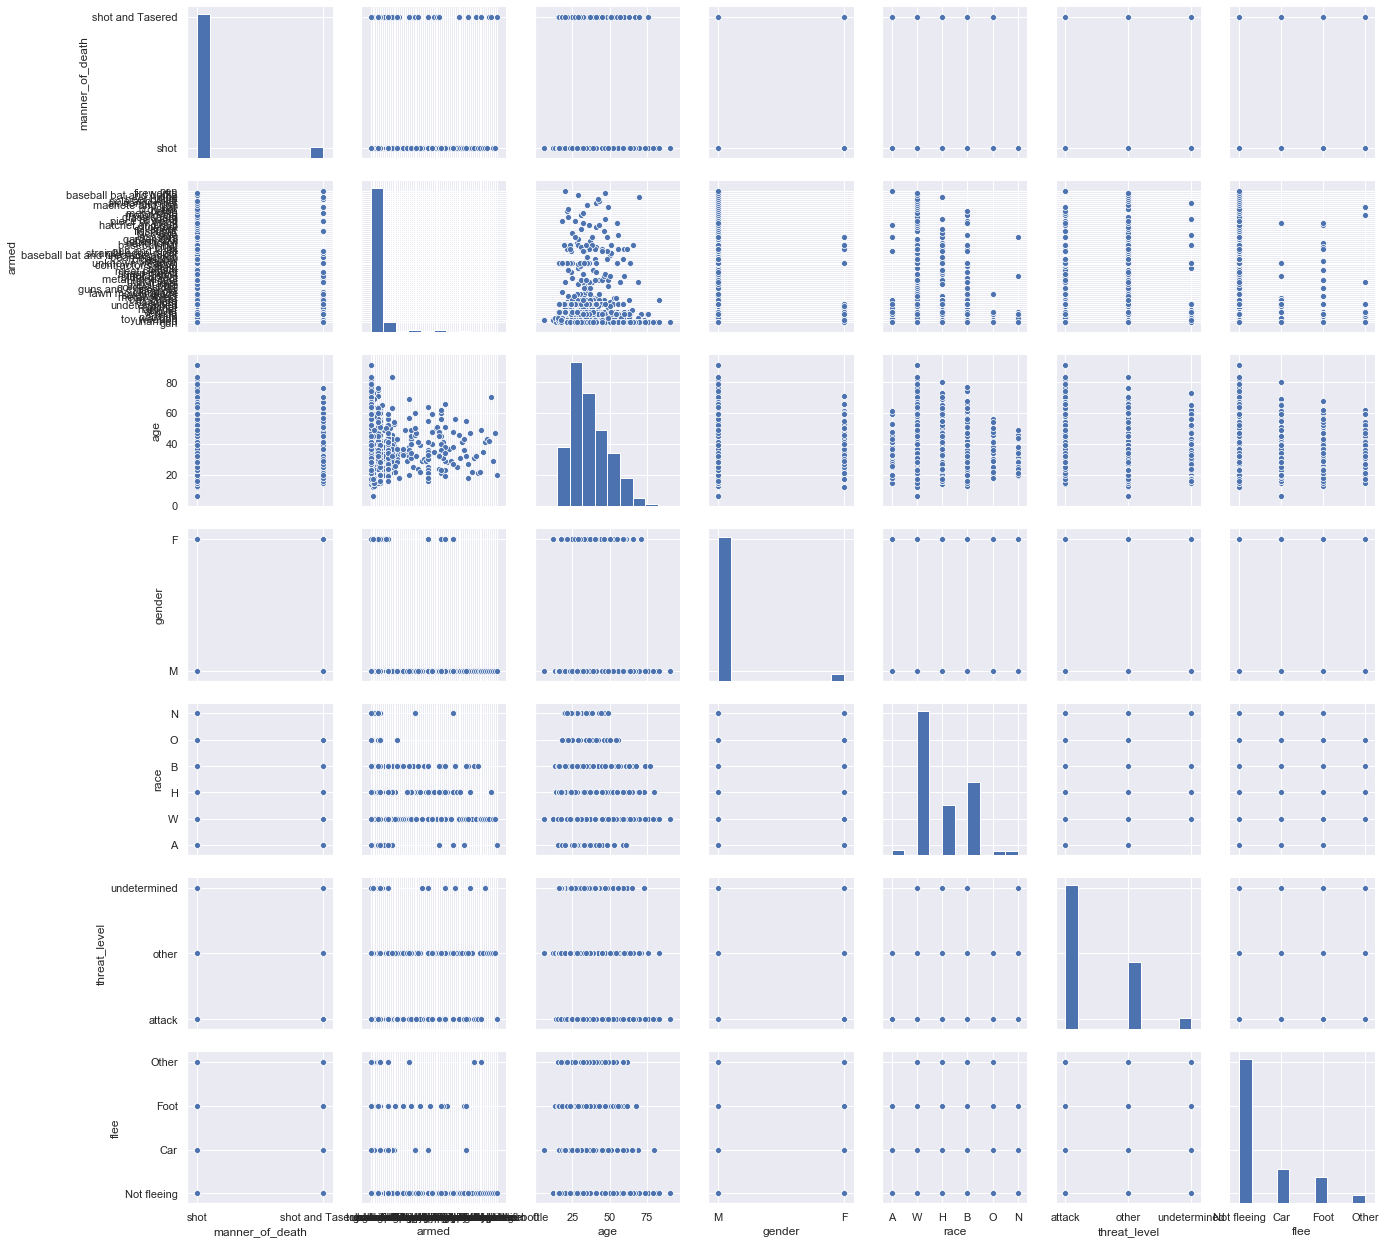

In [104]:
sns.pairplot(killings, vars = ["manner_of_death", "armed", "age", "gender", "race", "threat_level", "flee"])

### How many People fled

In [105]:
flee = killings[['race', 'flee']]
flee['count'] = 1
flee = flee.groupby(['race','flee'], as_index=False)['count'].sum()

C:\Users\zeusg\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [106]:
flee.head()

,race,flee,count
0,A,Car,4
1,A,Foot,5
2,A,Not fleeing,27
3,B,Car,89
4,B,Foot,112


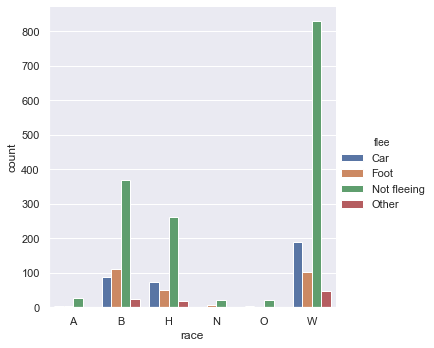

In [107]:
sns.catplot(x="race", y="count", hue="flee", kind="bar", data=flee)

### View the same graph as a %

In [108]:
race_count = flee.groupby('race', as_index=False)['count'].sum()
#flee['percent'] = flee['count']/(race_count['count'].loc[race_count['race'] == flee['race']][0])
race_count.head()

,race,count
0,A,36
1,B,592
2,H,401
3,N,29
4,O,28


In [109]:
race_count['count'].loc[race_count['race'] == 'A'][0]

36

In [110]:
race_count = flee.groupby(['race'], as_index=False)['count'].sum()
race_count.head()

,race,count
0,A,36
1,B,592
2,H,401
3,N,29
4,O,28


In [111]:
flee['percent'] = 0
flee.head()
flee.loc[flee['race'] == 'A']

,race,flee,count,percent
0,A,Car,4,0
1,A,Foot,5,0
2,A,Not fleeing,27,0


In [112]:
#For each race, set the percentage as the count of that category of fleeing by the total number of instences with that race
for race in race_count['race']:
    flee.loc[flee['race'] == race, 'percent'] =  flee[flee['race'] == race]['count']/race_count.loc[race_count['race'] == race].reset_index()['count'][0]

In [113]:
flee

,race,flee,count,percent
0,A,Car,4,0.111111
1,A,Foot,5,0.138889
2,A,Not fleeing,27,0.750000
3,B,Car,89,0.150338
4,B,Foot,112,0.189189
5,B,Not fleeing,368,0.621622
6,B,Other,23,0.038851
7,H,Car,72,0.179551
8,H,Foot,50,0.124688
9,H,Not fleeing,261,0.650873


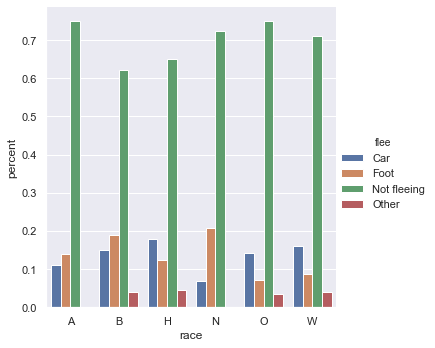

In [114]:
sns.catplot(x="race", y="percent", hue="flee", kind="bar", data=flee)

# Armed

In [115]:
killings.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [173]:
armed = killings[['race', 'armed']]
armed.loc[armed.armed.str.contains("gun"),'armed'] = 'gun'
armed.loc[armed.armed.str.contains("sword"),'armed'] = 'blade'
armed.loc[armed.armed.str.contains("knife"),'armed'] = 'blade'
armed.loc[armed.armed.str.contains("box cutter"),'armed'] = 'blade'
armed.loc[armed.armed.str.contains("ax"),'armed'] = 'blade'
armed.loc[armed.armed.str.contains("machete"),'armed'] = 'blade'
armed.loc[armed.armed.str.contains("scissors"),'armed'] = 'blade'
armed.loc[armed.armed.str.contains("spear"),'armed'] = 'blade'
armed.loc[armed.armed.str.contains("hatchet"),'armed'] = 'blade'
armed.loc[armed.armed.str.contains("lawn mower"),'armed'] = 'blade'

armed.loc[(armed.armed.str.contains("blade") == False) & (armed.armed.str.contains("gun") == False) & (armed.armed.str.contains("vehicle") == False) & (armed.armed.str.contains("unarmed") == False) ,'armed'] = 'other'
armed

C:\Users\zeusg\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\zeusg\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\zeusg\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the 

,race,armed
0,A,gun
1,W,gun
2,H,unarmed
3,W,other
4,H,gun
...,...,...
2519,B,other
2523,B,vehicle
2525,B,gun
2533,B,vehicle


In [174]:
armed['count'] = 1
armed = armed.groupby(['race','armed'], as_index=False)['count'].sum()

C:\Users\zeusg\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [175]:
print_full(armed)

   race    armed  count
0     A    blade     16
1     A      gun     13
2     A    other      4
3     A  vehicle      3
4     B    blade     75
5     B      gun    340
6     B    other     72
7     B  unarmed     61
8     B  vehicle     44
9     H    blade     76
10    H      gun    200
11    H    other     63
12    H  unarmed     33
13    H  vehicle     29
14    N    blade      6
15    N      gun     17
16    N    other      2
17    N  unarmed      2
18    N  vehicle      2
19    O    blade      9
20    O      gun     11
21    O    other      1
22    O  unarmed      4
23    O  vehicle      3
24    W    blade    194
25    W      gun    679
26    W    other    153
27    W  unarmed     65
28    W  vehicle     77


In [176]:
armed.loc[armed.armed.str.contains("gun")]

,race,armed,count
1,A,gun,13
5,B,gun,340
10,H,gun,200
15,N,gun,17
20,O,gun,11
25,W,gun,679


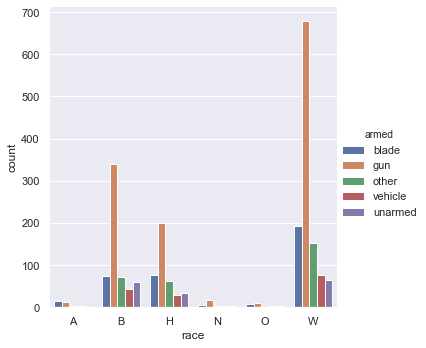

In [177]:
sns.catplot(x="race", y="count", hue="armed", kind="bar", data=armed)

In [178]:
for race in race_count['race']:
    armed.loc[armed['race'] == race, 'percent'] =  armed[armed['race'] == race]['count']/race_count.loc[race_count['race'] == race].reset_index()['count'][0]
armed

,race,armed,count,percent
0,A,blade,16,0.444444
1,A,gun,13,0.361111
2,A,other,4,0.111111
3,A,vehicle,3,0.083333
4,B,blade,75,0.126689
5,B,gun,340,0.574324
6,B,other,72,0.121622
7,B,unarmed,61,0.103041
8,B,vehicle,44,0.074324
9,H,blade,76,0.189526


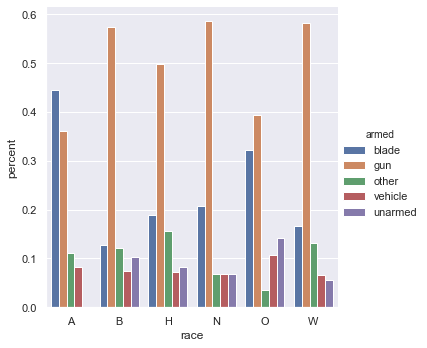

In [179]:
sns.catplot(x="race", y="percent", hue="armed", kind="bar", data=armed)

# Mental illness

In [189]:

killings['count'] = 1
killings

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,count
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,1
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,1
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,1
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,1
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2519,2805,Aries Clark,25/07/17,shot,undetermined,16.0,M,B,Marion,AR,False,undetermined,Not fleeing,False,1
2523,2808,Kesharn K. Burney,26/07/17,shot,vehicle,25.0,M,B,Dayton,OH,False,attack,Car,False,1
2525,2820,Deltra Henderson,27/07/17,shot,gun,39.0,M,B,Homer,LA,False,attack,Car,False,1
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.0,M,B,Oshkosh,WI,False,attack,Car,True,1


In [191]:
illness = killings[['signs_of_mental_illness', 'count']]

In [192]:
illness

,signs_of_mental_illness,count
0,True,1
1,False,1
2,False,1
3,True,1
4,False,1
...,...,...
2519,False,1
2523,False,1
2525,False,1
2533,False,1


In [210]:
illness = illness.groupby('signs_of_mental_illness').sum().reset_index()
illness

,signs_of_mental_illness,count
0,False,1681
1,True,573


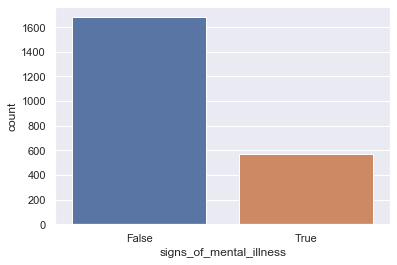

In [211]:
sns.barplot(x="signs_of_mental_illness", y="count", data=illness)

In [213]:
573/(573 + 1681)

0.2542147293700089

# Gender 

In [214]:
killings

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,count
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,1
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,1
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,1
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,1
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2519,2805,Aries Clark,25/07/17,shot,undetermined,16.0,M,B,Marion,AR,False,undetermined,Not fleeing,False,1
2523,2808,Kesharn K. Burney,26/07/17,shot,vehicle,25.0,M,B,Dayton,OH,False,attack,Car,False,1
2525,2820,Deltra Henderson,27/07/17,shot,gun,39.0,M,B,Homer,LA,False,attack,Car,False,1
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.0,M,B,Oshkosh,WI,False,attack,Car,True,1


In [215]:
gender = killings[['gender','count']]

In [216]:
gender

,gender,count
0,M,1
1,M,1
2,M,1
3,M,1
4,M,1
...,...,...
2519,M,1
2523,M,1
2525,M,1
2533,M,1


In [219]:
gender = gender.groupby('gender').sum().reset_index()

In [220]:
gender

,gender,count
0,F,94
1,M,2160


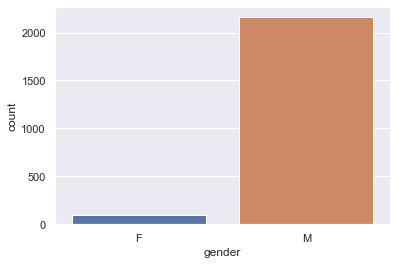

In [221]:
sns.barplot(x="gender", y="count", data=gender)